# Question 1

## Handwritten Digit Classification with Logistic Regression

### (a) 

Download the mnist49_3000.mat from Brightspace under HW3 folder.  This is a subset of the MNIST handwritten digit database, which is a well-known benchmark database for classi cation algorithms. This subset contains examples of the digits 4 and 9. The  data file contains variables x and y,  with  the  former  containing  patterns  and  the  latter  labels.   The images are stored as column vectors.  To visualize an image, in Python type:

In [1]:
#Imports
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.special import expit

(784, 3000) (1, 3000)
(3000, 784) (3000,)


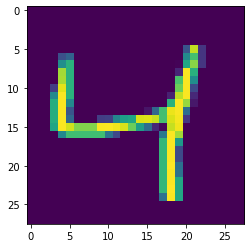

In [2]:
mnist_49_3000 = sio.loadmat('mnist_49_3000.mat')
x = mnist_49_3000['x']
y = mnist_49_3000['y']
d,n= x.shape

#the shapes of the data are weird, so im flipping them so the samples are x and features are y
print(x.shape, y.shape)
x = np.transpose(x)
y = y[0]
print(x.shape, y.shape)

i = 0 #Index of the image to be visualized
plt.imshow(np.reshape(x[i,:], (int(np.sqrt(d)),int(np.sqrt(d)))))
plt.show()

In [3]:
#split into train and test data 
train_size = 2000
x_train = x[:train_size, :]
x_test = x[train_size:, :]
y_train = y[:train_size]
y_test = y[train_size:]

print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(2000, 784) (1000, 784) (2000,) (1000,)


In [4]:
#append our column of 1's for ~x
def append_column_one(data):    
    append_ones = np.ones((data.shape[0],1))
    data = np.hstack((append_ones, data))
    return data

x_train = append_column_one(x_train)
x_test = append_column_one(x_test)
np.place(y_train, y_train == 0, -1)
np.place(y_test, y_test == 0, -1)

print(x_train.shape, x_test.shape)

(2000, 785) (1000, 785)


In [5]:
#function to calculate the sigmoid for each x
def sigmoid(x):
    if isinstance(x, np.ndarray):
        sig_x = []
        for i in range(len(x)):
            sig_x[i] = 1.0 / (1.0 + np.exp(-x[i]))
        return sig_x
    else:
        return 1.0 / (1.0 + np.exp(-x))

In [6]:
def reg_neg_log_likelihood(x_train, y_train, weights, lam):
    output = 0
    for i in range(0, x_train.shape[0]):
        output += -np.log(sigmoid(y_train[i] * np.dot(x_train[i], weights))) + (lam  * np.linalg.norm(x_train[i]))
    return output

In [7]:
def gradient(x_train, y_train, weights):
    update = np.zeros(len(weights))
    for i in range(0, x_train.shape[0]):
        update = update + y_train[i] * (1 - sigmoid(y_train[i] * np.dot(x_train[i], weights))) * x_train[i]
    return update

In [8]:
def hessian(x_train, y_train, weights):
    identity_matrix = np.identity(len(weights))
    output_matrix = np.zeros((len(weights), len(weights)))
    for i in range(0, x_train.shape[0]):
        sig_value =  sigmoid(np.dot(x_train[i], weights))
        output_matrix += sig_value * (1 - sig_value) * np.outer(x_train[i], x_train[i])
    matrix = -output_matrix - identity_matrix
    return np.linalg.inv(matrix)

In [9]:
def newton(x_train, y_train, i, lam):    
    objective_value = []
    w = np.zeros(x_train.shape[1])
    #print len(w)
    for j in range(1, i+1):
        print("Iteration ", j)
        print("Objective Function Value ", reg_neg_log_likelihood(x_train, y_train, w, lam))
        objective_value.append(reg_neg_log_likelihood(x_train, y_train, w, lam))
        w = w - (np.dot(hessian(x_train, y_train, w), gradient(x_train, y_train, w)))
    return objective_value, w

Iteration  1
Objective Function Value  181776.1021122936
Iteration  2
Objective Function Value  180792.02557671544
Iteration  3
Objective Function Value  180590.46665884473
Iteration  4
Objective Function Value  180501.36696567188
Iteration  5
Objective Function Value  180457.71923714134
Iteration  6
Objective Function Value  180435.0005606026
Iteration  7
Objective Function Value  180422.60160374967
Iteration  8
Objective Function Value  180415.4432246233
Iteration  9
Objective Function Value  180410.89881675495
Iteration  10
Objective Function Value  180407.74415601074
Iteration  11
Objective Function Value  180405.4150672277
Iteration  12
Objective Function Value  180403.620884162
Iteration  13
Objective Function Value  180402.19493746504
Iteration  14
Objective Function Value  180401.03398498698
Iteration  15
Objective Function Value  180400.07034950372


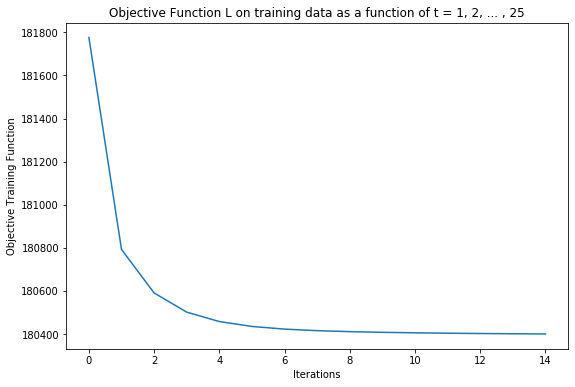

In [10]:
lam = 10
i = 15
answer, weights = newton(x_train, y_train, i, lam)

plt.figure(figsize=(9, 6))
plt.plot(answer)
plt.xlabel("Iterations")
plt.ylabel("Objective Training Function")
plt.title("Objective Function L on training data as a function of t = 1, 2, ... , 25")
plt.show()

In [11]:
def predict_test_data(x_test, weights):
    predicted_test = []
    sigmoid_difference = []
    for i in range(0, len(x_test)):
        output = sigmoid(np.dot(x_test[i], weights))
        if output > 0.5:
            predicted_test.append(1)
            sigmoid_difference.append(1-output)
        else:
            predicted_test.append(-1)
            sigmoid_difference.append(output)
    return predicted_test, sigmoid_difference

In [12]:
predictions, sigmoid_difference = predict_test_data(x_test, weights)

In [13]:
def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    return float(count)/len(predicted_labels)

In [14]:
print("Prediction accuracy is {}".format(prediction_accuracy(y_test, predictions)))

Prediction accuracy is 0.949


The termination critera was picked due to the rate of decrease of the objective function value in each iteration. I noticed that it started to plateau around iteration 5, but I ran it for 15 iterations to get a very miniscue higher accuracy. Anything greater than 10 iterations will result in decreasingly diminishing returns for the amount of time invested.

### (b) 

To quantify the confidence, I took the sigmoids that was calcutated for each ouput in predict_test_data. If the output was greater than 0.5, then high confidence would be values close to 1. If the output was less than or equal to 0.5, then high confidence would be values close to 0. Therefore we look at the difference the sigmoid is away from it's classified value, 1 or zero. This infomation is stored in the "sigmoids_difference" array.

In [15]:
#find all incorrect predictions
def incorrect_predictions(predicted_labels, original_labels, sigmoids):
    num = 0
    x_test_reg = x[train_size:, :]
    bad_values = {}  #dictionary to hold all indicies as key and sigmoid as value
    for i in range(len(predicted_labels)):
        if predicted_labels[i] != original_labels[i]:
            bad_values[i] = sigmoids[i]
            
    
    #sort by sigmoid, higher the sigmoid, higher the confidence
    sort_bad_values = sorted(bad_values.items(), key=lambda x: x[1], reverse=False)
    
    
    
    #
    w = 10
    h = 10
    fig = plt.figure(figsize=(9, 13))
    columns = 5
    rows = 4

    # prep (x,y) for extra plotting
    xs = np.linspace(0, 2*np.pi, 60)  # from 0 to 2pi
    ys = np.abs(np.sin(xs))           # absolute of sine

    # ax enables access to manipulate each of subplots
    ax = []

    for i in range(columns*rows):
        img = np.reshape(x_test_reg[sort_bad_values[i][0]], (int(np.sqrt(d)),int(np.sqrt(d))))
        # create subplot and append to ax
        ax.append( fig.add_subplot(rows, columns, i+1) )
        
        #if y_test says 1, its a 9, if its -1, then its a 4
        if y_test[sort_bad_values[i][0]] == 1:
            num = 9
        else:
            num = 4
            
        ax[-1].set_title("actual: " + str(num))  # set title
        plt.imshow(img)

    # do extra plots on selected axes/subplots
    # note: index starts with 0
    ax[2].plot(xs, 3*ys)
    ax[19].plot(ys**2, xs)

    plt.show()  # finally, render the plot


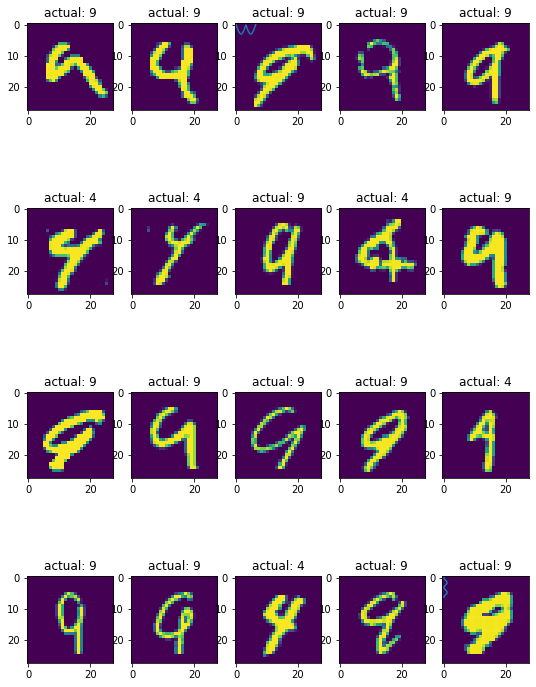

In [16]:
incorrect_predictions(predictions, y_test, sigmoid_difference)